In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scorepyo.ranking import (
    BordaRank,
    CumulativeMetric,
    DiverseLogOddsDensity,
    FasterRiskRank,
    LarsPathRank,
    LassoPathRank,
    LogOddsDensity,
    OMPRank,
)
from scorepyo._utils import fast_numba_auc
list_ranker = [DiverseLogOddsDensity(1), LogOddsDensity()]

rankers_tested = (BordaRank(list_ranker),
    CumulativeMetric(
                metric=fast_numba_auc, ranker=DiverseLogOddsDensity(1)
            ),
    DiverseLogOddsDensity(),
    DiverseLogOddsDensity(1),
    FasterRiskRank(
                min_point_value=-2,
                max_point_value=3,
                nb_max_features=4,
            ),
    LarsPathRank(),
    LassoPathRank(),
    LogOddsDensity(),
    OMPRank())

In [3]:
from benchmark import run 

df_results = run(1, list_datasets=[
    'heart', 


# 'mammo',
#                                    'spam',
# 'mushroom',
# 'bank', 
# 'adult',
], range_nb_additional_features=[
    # 1,
    # 3,
                                 5,
                                #  6,
                                #  7,
                                #  8,
                                #  10,
                                 ],
range_nb_binaries_by_features=(
    # 2,
                               3,
                            #    5,
                            #    10,
                               ),
sorting_methods=rankers_tested,
test_calibration=False,
optimization_methods=(
    'vanilla',
    #  'worse', 
    #  'mean',
    #  'worse_squared',
    #  'mean_squared'
     ),
)

used BordaRank
used DiverseLogOddsDensity
used log density
(216, 50)
used CumulativeMetric
used DiverseLogOddsDensity
(216, 50)
used DiverseLogOddsDensity
(216, 50)
used DiverseLogOddsDensity
(216, 50)
used FasterRiskRank
(216, 50)
used LarsPathRank
(216, 50)
used LassoPathRank
(216, 50)
used log density
(216, 50)
used OMPRank
(216, 50)


In [3]:
import seaborn as sb
import matplotlib.pyplot as plt

# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_risk_score_fit_time',hue='sorting_method')
# plt.show()
# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_train_orig_log_loss',hue='sorting_method')
# plt.show()
# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_test_log_loss',hue='sorting_method')
# plt.show()
# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_train_orig_roc_auc',hue='sorting_method')
# plt.show()
# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_test_roc_auc',hue='sorting_method')
# plt.show()

# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_risk_score_fit_time',hue='nb_binaries_by_feature')
# plt.show()
# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_train_orig_log_loss',hue='nb_binaries_by_feature')
# plt.show()
# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_test_log_loss',hue='nb_binaries_by_feature')
# plt.show()
# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_train_orig_roc_auc',hue='nb_binaries_by_feature')
# plt.show()
# sb.lineplot(data=df_results, x='nb_additional_features', y='ebm_test_roc_auc',hue='nb_binaries_by_feature')

In [4]:
df_results.columns

Index(['faster_risk_train_orig_log_loss',
       'faster_risk_train_orig_average_precision',
       'faster_risk_train_orig_roc_auc', 'faster_risk_train_log_loss',
       'faster_risk_train_average_precision', 'faster_risk_train_roc_auc',
       'faster_risk_calib_log_loss', 'faster_risk_calib_average_precision',
       'faster_risk_calib_roc_auc', 'faster_risk_test_log_loss',
       'faster_risk_test_average_precision', 'faster_risk_test_roc_auc',
       'ebm_train_orig_log_loss', 'ebm_train_orig_average_precision',
       'ebm_train_orig_roc_auc', 'ebm_train_log_loss',
       'ebm_train_average_precision', 'ebm_train_roc_auc',
       'ebm_calib_log_loss', 'ebm_calib_average_precision',
       'ebm_calib_roc_auc', 'ebm_test_log_loss', 'ebm_test_average_precision',
       'ebm_test_roc_auc', 'faster_risk_fit_time', 'ebm_risk_score_fit_time',
       'random_seed', 'use_calibration', 'dataset', 'nb_additional_features',
       'sorting_method', 'nb_binaries_by_feature', 'optimization_met

# TODO 18/02/2023

* Check impact of number of binary features by features

* try to find the optimal set for heart data

* see on what kind of sets it performs better

* find a way to generalize well on test 

* look at dimension reduction to select a subset of features

In [5]:
selected_cols = ['dataset', 'nb_additional_features', 'sorting_method','ebm_train_roc_auc','faster_risk_test_log_loss','ebm_test_log_loss',
       'faster_risk_test_average_precision', 
         'ebm_test_average_precision',
       'faster_risk_test_roc_auc','ebm_test_roc_auc', 
       'faster_risk_fit_time', 'ebm_risk_score_fit_time',
       'random_seed',]

In [6]:
# df_results[selected_cols]

In [7]:
df_results.columns

Index(['faster_risk_train_orig_log_loss',
       'faster_risk_train_orig_average_precision',
       'faster_risk_train_orig_roc_auc', 'faster_risk_train_log_loss',
       'faster_risk_train_average_precision', 'faster_risk_train_roc_auc',
       'faster_risk_calib_log_loss', 'faster_risk_calib_average_precision',
       'faster_risk_calib_roc_auc', 'faster_risk_test_log_loss',
       'faster_risk_test_average_precision', 'faster_risk_test_roc_auc',
       'ebm_train_orig_log_loss', 'ebm_train_orig_average_precision',
       'ebm_train_orig_roc_auc', 'ebm_train_log_loss',
       'ebm_train_average_precision', 'ebm_train_roc_auc',
       'ebm_calib_log_loss', 'ebm_calib_average_precision',
       'ebm_calib_roc_auc', 'ebm_test_log_loss', 'ebm_test_average_precision',
       'ebm_test_roc_auc', 'faster_risk_fit_time', 'ebm_risk_score_fit_time',
       'random_seed', 'use_calibration', 'dataset', 'nb_additional_features',
       'sorting_method', 'nb_binaries_by_feature', 'optimization_met

In [8]:
import pandas as pd
pd.options.display.max_columns = 50
df_results[(df_results['optimization_method']=="vanilla")]
df_results

,faster_risk_train_orig_log_loss,faster_risk_train_orig_average_precision,faster_risk_train_orig_roc_auc,faster_risk_train_log_loss,faster_risk_train_average_precision,faster_risk_train_roc_auc,faster_risk_calib_log_loss,faster_risk_calib_average_precision,faster_risk_calib_roc_auc,faster_risk_test_log_loss,faster_risk_test_average_precision,faster_risk_test_roc_auc,ebm_train_orig_log_loss,ebm_train_orig_average_precision,ebm_train_orig_roc_auc,ebm_train_log_loss,ebm_train_average_precision,ebm_train_roc_auc,ebm_calib_log_loss,ebm_calib_average_precision,ebm_calib_roc_auc,ebm_test_log_loss,ebm_test_average_precision,ebm_test_roc_auc,faster_risk_fit_time,ebm_risk_score_fit_time,random_seed,use_calibration,dataset,nb_additional_features,sorting_method,nb_binaries_by_feature,optimization_method
0,0.370948,0.881740,0.906889,0.348301,0.912756,0.917989,0.404527,0.834678,0.892702,0.413492,0.825551,0.888889,0.372901,0.869395,0.906889,0.342171,0.924528,0.931698,0.418467,0.768968,0.867375,0.470917,0.777691,0.849206,0.663747,4.807921,881.0,True,heart,3.0,fasterrisk,3.0,vanilla
1,0.370948,0.881740,0.906889,0.348301,0.912756,0.917989,0.404527,0.834678,0.892702,0.413492,0.825551,0.888889,0.387764,0.869395,0.906889,0.360303,0.924528,0.931698,0.428483,0.768968,0.867375,0.492861,0.777691,0.849206,0.645550,2.721804,881.0,True,heart,3.0,fasterrisk,3.0,worse
2,0.370948,0.881740,0.906889,0.348301,0.912756,0.917989,0.404527,0.834678,0.892702,0.413492,0.825551,0.888889,0.374771,0.869395,0.906889,0.344317,0.924528,0.931698,0.419928,0.768968,0.867375,0.479047,0.777691,0.849206,0.721892,2.503563,881.0,True,heart,3.0,fasterrisk,3.0,mean
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.383934,0.863373,0.899397,0.383934,0.863373,0.899397,0.383934,0.863373,0.899397,0.301899,0.869182,0.937500,0.368162,0.879901,0.905259,0.368162,0.879901,0.905259,0.368162,0.879901,0.905259,0.319679,0.893203,0.938971,0.787948,6.262391,862.0,False,heart,5.0,mix_fasterrisk,3.0,vanilla
196,0.383934,0.863373,0.899397,0.383934,0.863373,0.899397,0.383934,0.863373,0.899397,0.301899,0.869182,0.937500,0.384190,0.879901,0.905259,0.384190,0.879901,0.905259,0.384190,0.879901,0.905259,0.342960,0.893203,0.938971,0.930298,7.422329,862.0,False,heart,5.0,mix_fasterrisk,3.0,worse
197,0.383934,0.863373,0.899397,0.383934,0.863373,0.899397,0.383934,0.863373,0.899397,0.301899,0.869182,0.937500,0.368545,0.879901,0.905259,0.368545,0.879901,0.905259,0.368545,0.879901,0.905259,0.322440,0.893203,0.938971,0.737128,7.679377,862.0,False,heart,5.0,mix_fasterrisk,3.0,mean
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,None


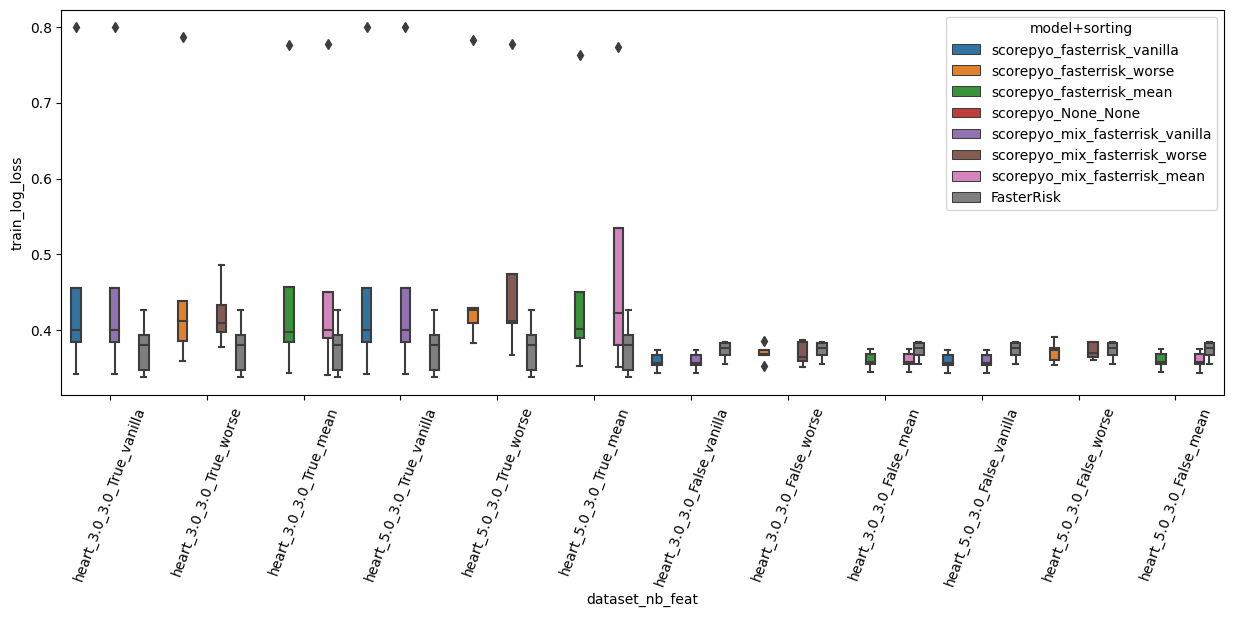

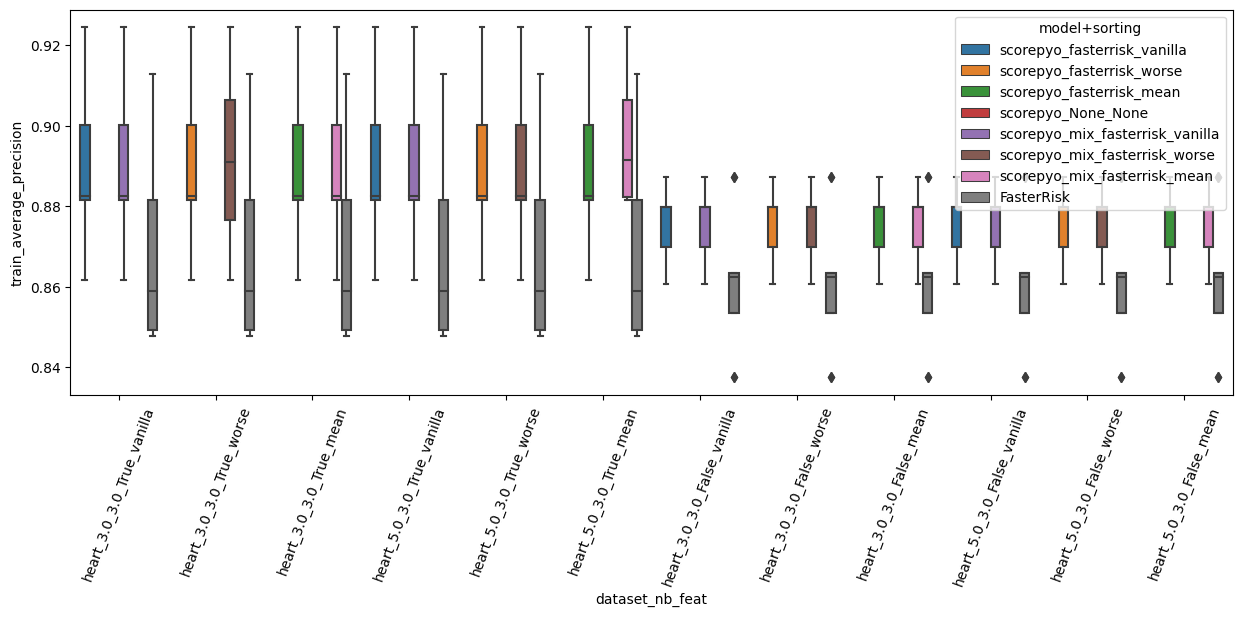

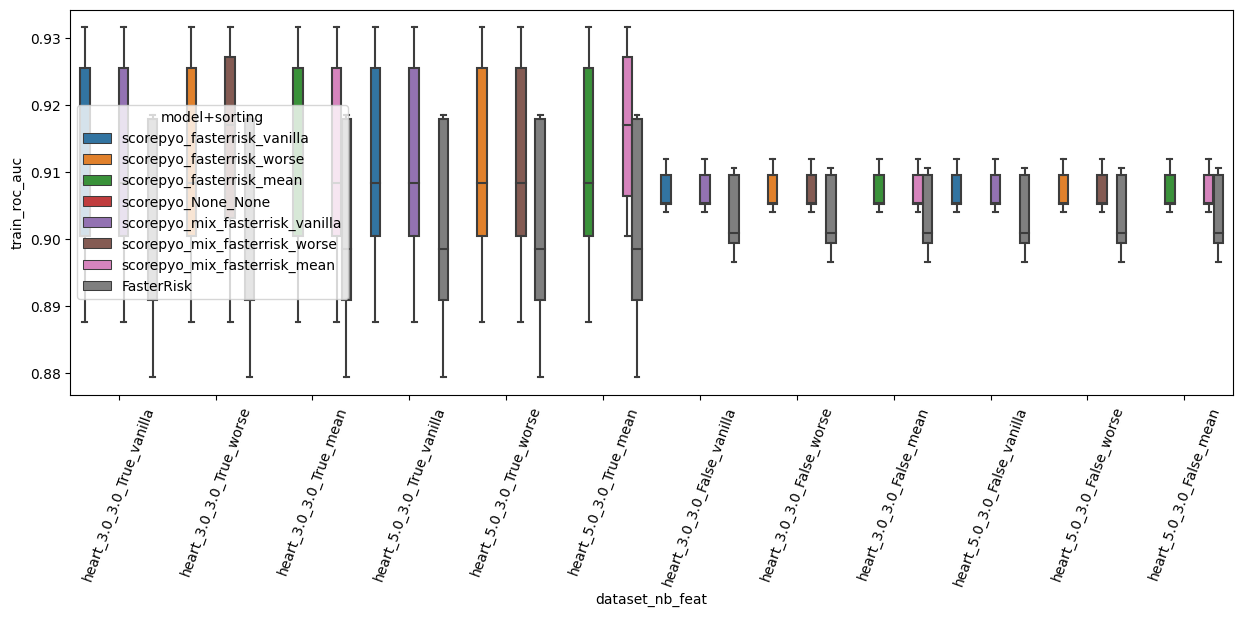

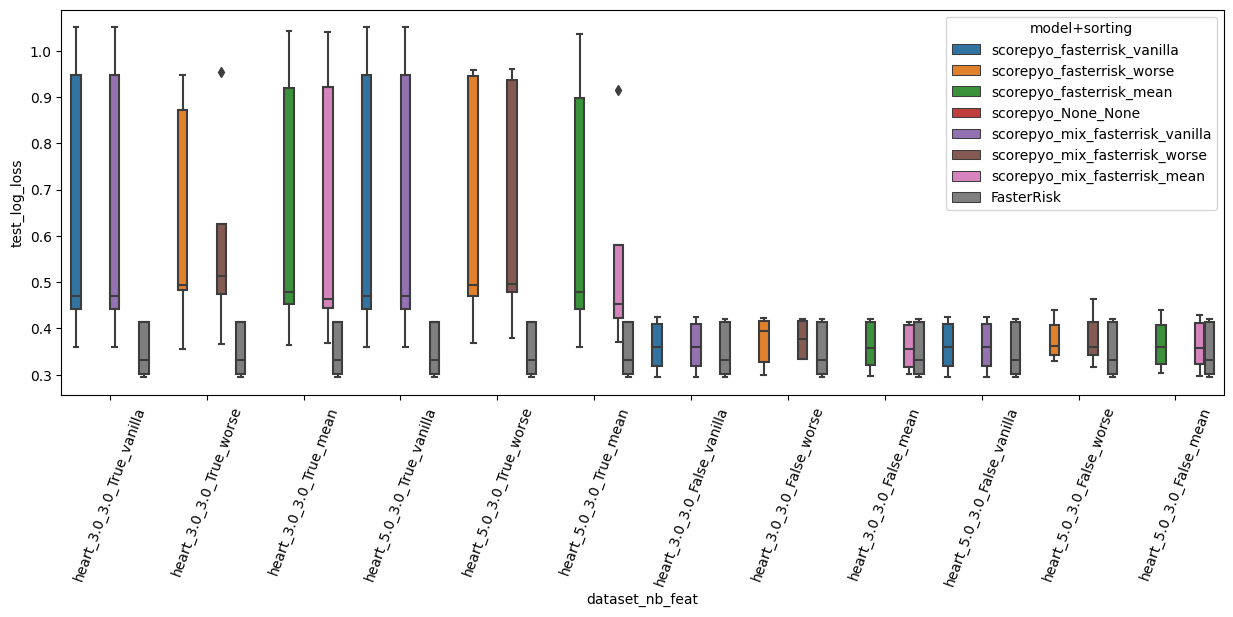

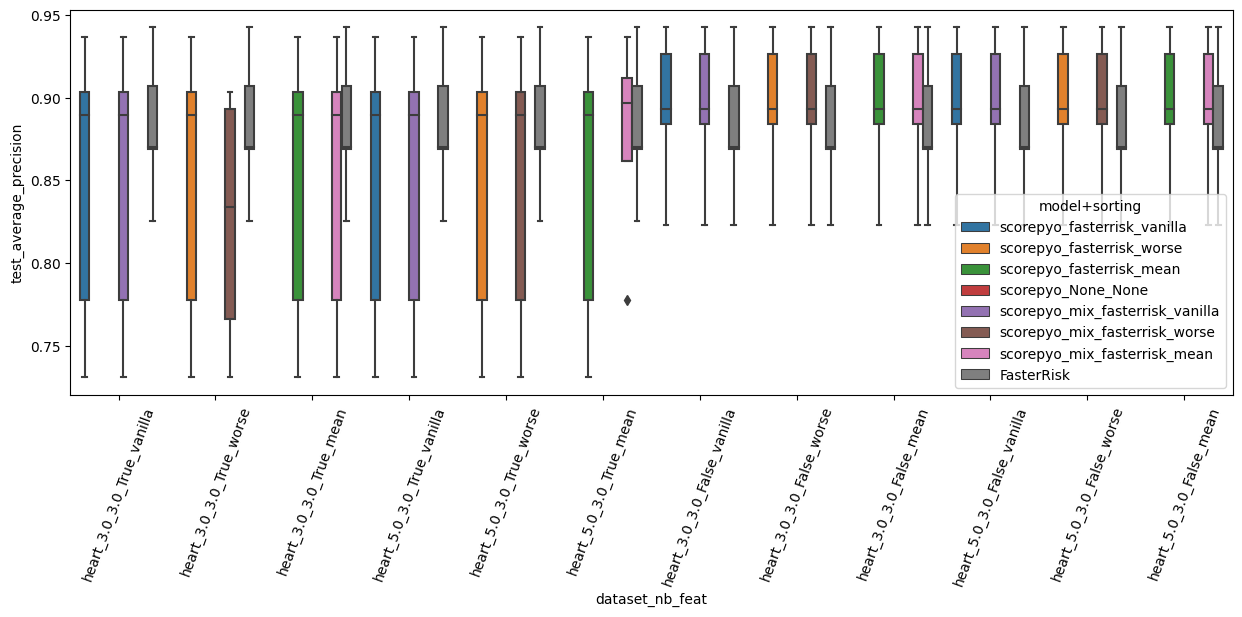

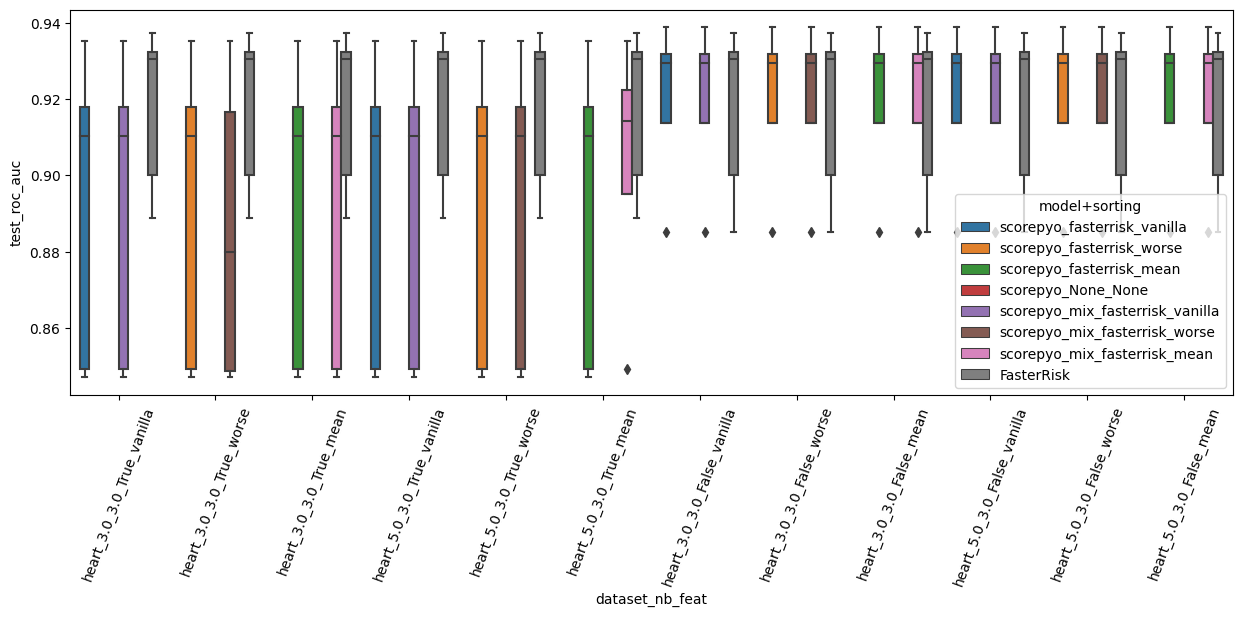

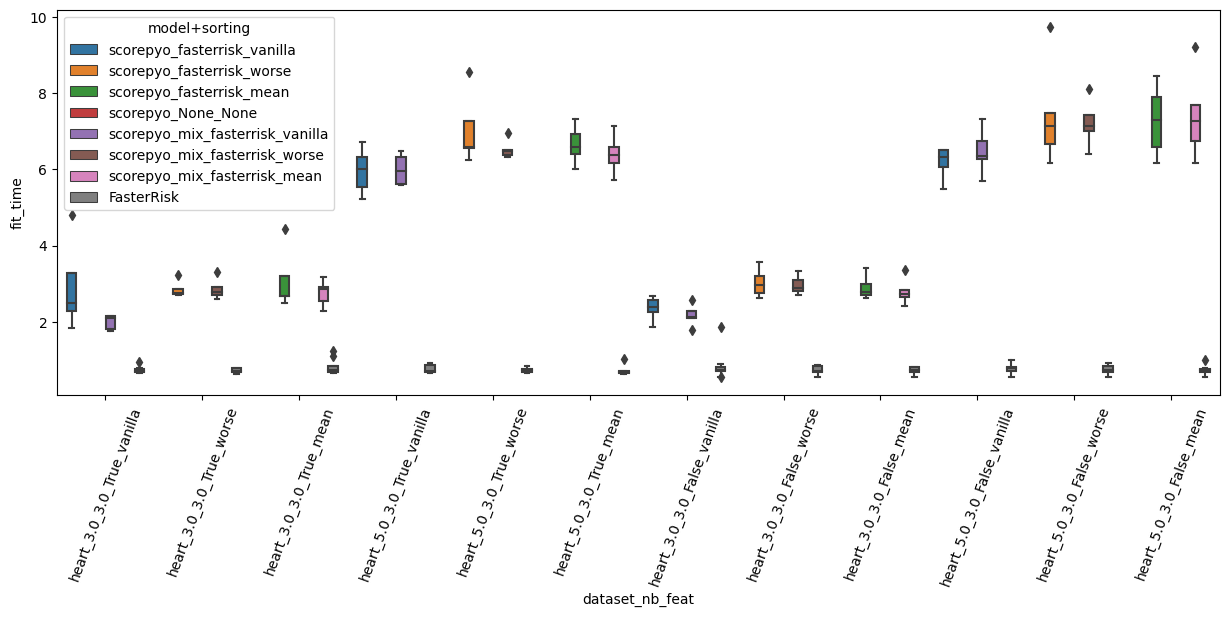

In [9]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt


columns_fasterrisk = ['faster_risk_train_orig_log_loss',
       'faster_risk_train_orig_average_precision',
       'faster_risk_train_orig_roc_auc', 'faster_risk_train_log_loss',
       'faster_risk_train_average_precision', 'faster_risk_train_roc_auc',
       'faster_risk_calib_log_loss', 'faster_risk_calib_average_precision',
       'faster_risk_calib_roc_auc', 'faster_risk_test_log_loss',
       'faster_risk_test_average_precision', 'faster_risk_test_roc_auc',
       'faster_risk_fit_time']

columns_ebm = ['ebm_train_orig_log_loss', 'ebm_train_orig_average_precision',
       'ebm_train_orig_roc_auc', 'ebm_train_log_loss',
       'ebm_train_average_precision', 'ebm_train_roc_auc',
       'ebm_calib_log_loss', 'ebm_calib_average_precision',
       'ebm_calib_roc_auc', 'ebm_test_log_loss', 'ebm_test_average_precision',
       'ebm_test_roc_auc','ebm_risk_score_fit_time',]

common_columns =  ['random_seed', 'use_calibration', 'dataset', 'nb_additional_features','sorting_method', 'nb_binaries_by_feature', 'optimization_method']
df_ebm = df_results[columns_ebm + common_columns]

df_ebm.columns = [c.replace('ebm_','') for c in df_ebm.columns]
df_ebm.columns = [c.replace('risk_score_','') for c in df_ebm.columns]
df_ebm['model'] = 'scorepyo'
df_ebm['model+nb_feat+sorting'] = df_ebm['model'] + '_' + df_ebm['nb_additional_features'].astype(str) + '_' +df_ebm['sorting_method'].astype(str)
df_ebm['model+sorting'] = df_ebm['model'] + '_' +df_ebm['sorting_method'].astype(str) + '_' +df_ebm['optimization_method'].astype(str)


df_faster_risk = df_results[columns_fasterrisk+common_columns]
df_faster_risk.columns = [c.replace('faster_risk_','') for c in df_faster_risk.columns]
df_faster_risk['model'] = 'FasterRisk'
df_faster_risk['model+nb_feat+sorting'] = 'FasterRisk'
df_faster_risk['model+sorting'] = 'FasterRisk'

df_results_reoriented = pd.concat([df_ebm, df_faster_risk], axis=0)
df_results_reoriented['dataset_nb_feat'] = df_results_reoriented['dataset'] + '_' + df_results_reoriented['nb_additional_features'].astype(str) + '_' + df_results_reoriented['nb_binaries_by_feature'].astype(str) + '_' + df_results_reoriented['use_calibration'].astype(str) + '_' +df_results_reoriented['optimization_method'].astype(str)  


for data in [
       # 'train_orig', 
       'train', 
       # 'calib', 
'test']:
    for metric in ['log_loss', 'average_precision', 'roc_auc']:
        col = data+'_'+metric
        plt.figure(figsize=(15,5))
        sb.boxplot(data=df_results_reoriented, x='dataset_nb_feat', y=col, hue='model+sorting')
        plt.xticks(rotation=70)
        plt.show()


col = 'fit_time'
plt.figure(figsize=(15,5))
sb.boxplot(data=df_results_reoriented, x='dataset_nb_feat', y=col, hue='model+sorting')
plt.xticks(rotation=70)
plt.show()

In [10]:
for metric in ['average_precision', 'roc_auc']:
    df_results[f'EBM_better_{metric}'] = (df_results[f'ebm_test_{metric}'] >= df_results[f'faster_risk_test_{metric}'])
    df_results[f'EBM_better_train_{metric}'] = (df_results[f'ebm_train_{metric}'] >= df_results[f'faster_risk_train_{metric}'])

    df_results[f'EBM_difference_{metric}'] = (df_results[f'ebm_test_{metric}']/df_results[f'faster_risk_test_{metric}'])*100.0-100.0
    df_results[f'EBM_difference_train_{metric}'] = (df_results[f'ebm_train_{metric}']/df_results[f'faster_risk_train_{metric}'])*100.0-100.0


In [11]:
for metric in ['log_loss']:
     df_results[f'EBM_better_{metric}'] = (df_results[f'ebm_test_{metric}'] <= df_results[f'faster_risk_test_{metric}'])
     df_results[f'EBM_better_train_{metric}'] = (df_results[f'ebm_train_{metric}'] <= df_results[f'faster_risk_train_{metric}'])

     df_results[f'EBM_difference_{metric}'] = 100- (df_results[f'ebm_test_{metric}']/df_results[f'faster_risk_test_{metric}'])*100 
     df_results[f'EBM_difference_train_{metric}'] = 100-(df_results[f'ebm_train_{metric}']/df_results[f'faster_risk_train_{metric}'])*100 

for metric in ['fit_time']:
     df_results[f'EBM_better_{metric}'] = (df_results[f'faster_risk_{metric}'] >= df_results[f'ebm_risk_score_{metric}'])
     df_results[f'EBM_better_train_{metric}'] = (df_results[f'faster_risk_{metric}'] >= df_results[f'ebm_risk_score_{metric}'])

     df_results[f'EBM_difference_{metric}'] = (df_results[f'ebm_risk_score_{metric}']/df_results[f'faster_risk_{metric}'])*100-100
     df_results[f'EBM_difference_train_{metric}'] = (df_results[f'ebm_risk_score_{metric}']/df_results[f'faster_risk_{metric}'])*100-100

In [12]:
df_results.groupby([
                    'sorting_method',
                    'optimization_method',
                    'nb_additional_features', 
                    # 'nb_binaries_by_feature', 
                     'dataset',
                    # 'use_calibration'
                    ]).agg(
    
    AP=pd.NamedAgg('EBM_better_average_precision','mean'),
    AP_diff=pd.NamedAgg('EBM_difference_average_precision','mean'),

    ROC_AUC=pd.NamedAgg('EBM_better_roc_auc','mean'),
    ROC_AUC_diff=pd.NamedAgg('EBM_difference_roc_auc','mean'),

    log_loss=pd.NamedAgg('EBM_better_log_loss','mean'),
    log_loss_diff=pd.NamedAgg('EBM_difference_log_loss','mean'),

    fit_time=pd.NamedAgg('EBM_better_fit_time','mean'),
    fit_time_diff=pd.NamedAgg('EBM_difference_fit_time','mean'),

    AP_train=pd.NamedAgg('EBM_better_train_average_precision','mean'),
    ROC_AUC_train=pd.NamedAgg('EBM_better_train_roc_auc','mean'),
    log_loss_train=pd.NamedAgg('EBM_better_train_log_loss','mean'),

    
    
).round(2)

AP  \
sorting_method optimization_method nb_additional_features dataset         
fasterrisk     mean                3.0                    heart    0.70   
                                   5.0                    heart    0.70   
               vanilla             3.0                    heart    0.70   
                                   5.0                    heart    0.70   
               worse               3.0                    heart    0.70   
                                   5.0                    heart    0.70   
mix_fasterrisk mean                3.0                    heart    0.70   
                                   5.0                    heart    0.78   
               vanilla             3.0                    heart    0.70   
                                   5.0                    heart    0.70   
               worse               3.0                    heart    0.67   
                                   5.0                    heart    0.70   

                                                                   AP_diff  \
sorting_method optimization_method nb_additional_features dataset            
fasterrisk     mean                3.0                    heart      -1.39   
                                   5.0                    heart      -1.39   
               vanilla             3.0                    heart      -1.39   
                                   5.0                    heart      -1.39   
               worse               3.0                    heart      -1.39   
                                   5.0                    heart      -1.39   
mix_fasterrisk mean                3.0                    heart      -1.39   
                                   5.0                    heart       0.22   
               vanilla             3.0                    heart      -1.39   
                                   5.0                    heart      -1.39   
               worse               3.0                    heart      -1.90   
                                   5.0                    heart      -1.39   

                                                                   ROC_AUC  \
sorting_method optimization_method nb_additional_features dataset            
fasterrisk     mean                3.0                    heart       0.60   
                                   5.0                    heart       0.60   
               vanilla             3.0                    heart       0.60   
                                   5.0                    heart       0.60   
               worse               3.0                    heart       0.60   
                                   5.0                    heart       0.60   
mix_fasterrisk mean                3.0                    heart       0.60   
                                   5.0                    heart       0.67   
               vanilla             3.0                    heart       0.60   
                                   5.0                    heart       0.60   
               worse               3.0                    heart       0.56   
                                   5.0                    heart       0.60   

                                                                   ROC_AUC_diff  \
sorting_method optimization_method nb_additional_features dataset                 
fasterrisk     mean                3.0                    heart           -1.24   
                                   5.0                    heart           -1.24   
               vanilla             3.0                    heart           -1.24   
                                   5.0                    heart           -1.24   
               worse               3.0                    heart           -1.24   
                                   5.0                    heart           -1.24   
mix_fasterrisk mean                3.0                    heart           -1.24   
                                   5.0                    heart           -0.31   
  

In [13]:
df_results_groupbyed = df_results.groupby([
                    'sorting_method',
                    'optimization_method',
                    'nb_additional_features', 
                    'nb_binaries_by_feature', 
                     'dataset',
                    'use_calibration'
                    ]).agg(
    
    AP=pd.NamedAgg('EBM_better_average_precision','mean'),
    AP_diff=pd.NamedAgg('EBM_difference_average_precision','mean'),

    ROC_AUC=pd.NamedAgg('EBM_better_roc_auc','mean'),
    ROC_AUC_diff=pd.NamedAgg('EBM_difference_roc_auc','mean'),

    log_loss=pd.NamedAgg('EBM_better_log_loss','mean'),
    log_loss_diff=pd.NamedAgg('EBM_difference_log_loss','mean'),

    fit_time=pd.NamedAgg('EBM_better_fit_time','mean'),
    fit_time_diff=pd.NamedAgg('EBM_difference_fit_time','mean'),

    AP_train=pd.NamedAgg('EBM_better_train_average_precision','mean'),
    ROC_AUC_train=pd.NamedAgg('EBM_better_train_roc_auc','mean'),
    log_loss_train=pd.NamedAgg('EBM_better_train_log_loss','mean'),

    
    
).round(2)
df_results_groupbyed['moyenne'] = df_results_groupbyed[['AP', 'ROC_AUC', 'log_loss']].mean(axis=1)
df_results_groupbyed.reset_index().groupby([
                    'sorting_method',
                    'optimization_method',
                    'nb_additional_features'])['moyenne'].mean()
df_results_groupbyed[(df_results_groupbyed['AP'] >=0.5) & (df_results_groupbyed['ROC_AUC'] >=0.5) & (df_results_groupbyed['log_loss'] >=0.4)]
df_results_groupbyed[(df_results_groupbyed['log_loss'] >=0.4)]
df_results_groupbyed.reset_index().groupby([
                    'sorting_method',
                    'optimization_method',
                    'nb_additional_features'])['moyenne'].mean().sort_values().tail(30)

sorting_method  optimization_method  nb_additional_features
mix_fasterrisk  worse                3.0                       0.383333
fasterrisk      mean                 5.0                       0.466667
                worse                3.0                       0.466667
                                     5.0                       0.466667
mix_fasterrisk  worse                5.0                       0.466667
fasterrisk      mean                 3.0                       0.500000
                vanilla              3.0                       0.500000
                                     5.0                       0.500000
mix_fasterrisk  mean                 3.0                       0.500000
                                     5.0                       0.500000
                vanilla              3.0                       0.500000
                                     5.0                       0.500000
Name: moyenne, dtype: float64

In [14]:
df_results_groupbyed.sort_values(by=['log_loss', 'fit_time_diff'], ascending=[False,True]).head(50)

AP  \
sorting_method optimization_method nb_additional_features nb_binaries_by_feature dataset use_calibration         
fasterrisk     vanilla             3.0                    3.0                    heart   False            1.00   
mix_fasterrisk vanilla             3.0                    3.0                    heart   False            1.00   
               mean                3.0                    3.0                    heart   False            1.00   
fasterrisk     mean                3.0                    3.0                    heart   False            1.00   
               vanilla             5.0                    3.0                    heart   False            1.00   
mix_fasterrisk vanilla             5.0                    3.0                    heart   False            1.00   
fasterrisk     worse               3.0                    3.0                    heart   False            1.00   
mix_fasterrisk worse               5.0                    3.0                    heart   False            1.00   
               mean                5.0                    3.0                    heart   False            1.00   
fasterrisk     worse               5.0                    3.0                    heart   False            1.00   
               mean                5.0                    3.0                    heart   False            1.00   
mix_fasterrisk vanilla             3.0                    3.0                    heart   True             0.40   
fasterrisk     mean                3.0                    3.0                    heart   True             0.40   
mix_fasterrisk mean                3.0                    3.0                    heart   True             0.40   
               worse               3.0                    3.0                    heart   True             0.25   
fasterrisk     worse               3.0                    3.0                    heart   True             0.40   
               vanilla             3.0                    3.0                    heart   True             0.40   
mix_fasterrisk worse               3.0                    3.0                    heart   False            1.00   
fasterrisk     vanilla             5.0                    3.0                    heart   True             0.40   
mix_fasterrisk vanilla             5.0                    3.0                    heart   True             0.40   
               worse               5.0                    3.0                    heart   True             0.40   
fasterrisk     mean                5.0                    3.0                    heart   True             0.40   
mix_fasterrisk mean                5.0                    3.0                    heart   True             0.50   
fasterrisk     worse               5.0                    3.0                    heart   True             0.40   

                                                                                                          AP_diff  \
sorting_method optimization_method nb_additional_features nb_binaries_by_feature dataset use_calibration            
fasterrisk     vanilla             3.0                    3.0                    heart   False               1.30   
mix_fasterrisk vanilla             3.0                    3.0                    heart   False               1.30   
               mean                3.0                    3.0                    heart   False               1.30   
fasterrisk     mean                3.0                    3.0                    heart   False               1.30   
               vanilla             5.0                    3.0                    heart   False               1.30   
mix_fasterrisk vanilla             5.0                    3.0                    heart   False               1.30   
fasterrisk     worse               3.0                    3.0                    heart   False               1.30   
mix_fasterrisk worse               5.0                    3.0                    heart   F

In [ ]:
# df_results_groupbyed[(df_results_groupbyed['AP_train'] >=0.8) & (df_results_groupbyed['ROC_AUC_train'] >=0.8) & (df_results_groupbyed['log_loss_train'] >=0.8)]